Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
<hr> | <hr>
<u> Assignment 9.1
**Names** |Gallano,Genaro
**Section** | CPE32S6
**Date Performed**: | 7/9/2024
**Date Submitted**: | 7/9/2024
**Instructor**: |Engr.Roman,Richard
<hr> | <hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Directory of the Dataset
data_set = ("/content/drive/MyDrive/Multi-class Weather Dataset")

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

Counts of images in each subfolder: {'Cloudy': 300, 'Rain': 215, 'Shine': 253, 'Sunrise': 357}


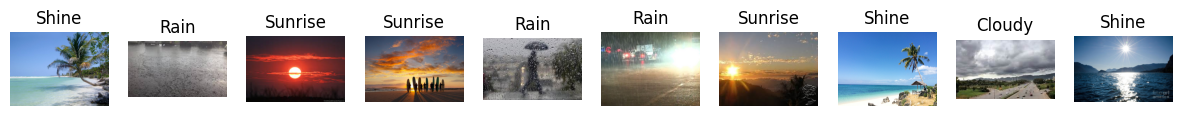

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_set="/content/drive/MyDrive/Multi-class Weather Dataset"

def count_images_in_subfolders(root_folder):
    class_counts = {}
    for foldername in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, foldername)
        if os.path.isdir(folder_path):
            image_count = len([filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))])
            class_counts[foldername] = image_count
    return class_counts

def visualize_random_images(directory, num_images=5):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, image_path in enumerate(random_images):
        img = mpimg.imread(image_path)
        subfolder_name = os.path.basename(os.path.dirname(image_path))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(subfolder_name)
    plt.show()

counts = count_images_in_subfolders(data_set)
print("Counts of images in each subfolder:", counts)

visualize_random_images(data_set, num_images=10)

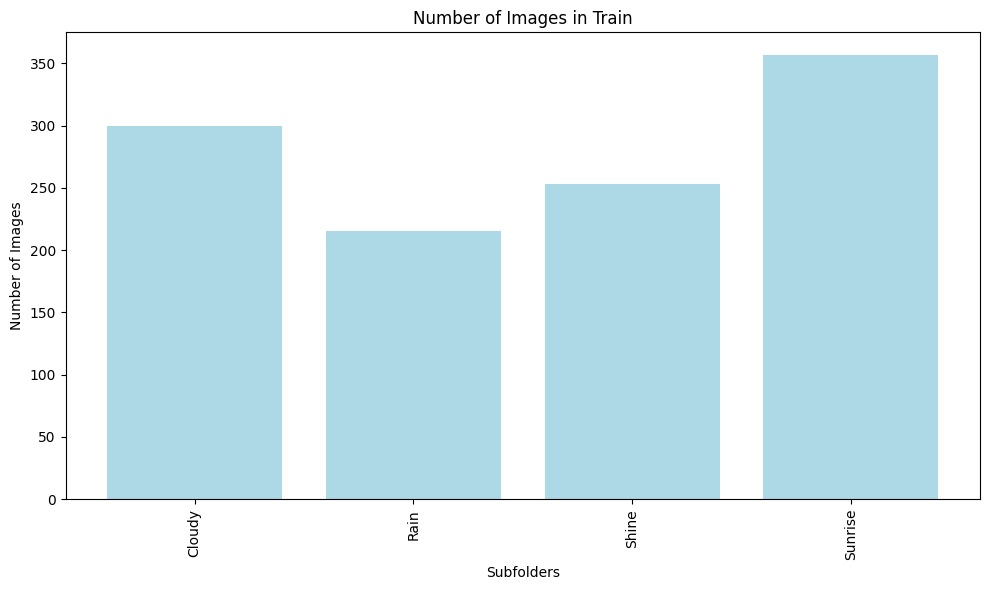

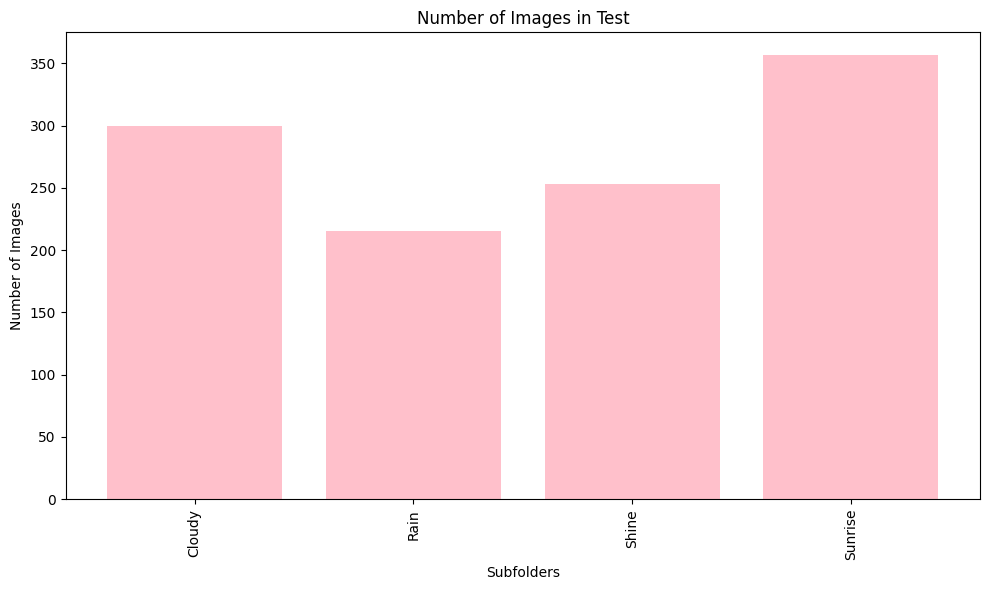

In [ ]:
def plot_bar_graph(class_counts, name, color):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color=color)
    plt.xlabel('Subfolders')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images in {name}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

class_counts = count_images_in_subfolders('/content/drive/MyDrive/Multi-class Weather Dataset')
plot_bar_graph(class_counts, 'Train', 'lightblue')

class_counts = count_images_in_subfolders('//content/drive/MyDrive/Multi-class Weather Dataset')
plot_bar_graph(class_counts, 'Test', 'pink')

In [12]:
img_height, img_width = 50, 50

# Define classes
classes = ['Sunrise', 'Shine', 'Rain', 'Cloudy']

image_data = []
category_labels = []

for idx, cat in enumerate(classes):
    cat_path = os.path.join(data_set, cat)
    for filename in os.listdir(cat_path):
        img_path = os.path.join(cat_path, filename)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        image_data.append(img_array)
        category_labels.append(idx)

images = np.array(image_data)
labels = np.array(category_labels)


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Shape of training images:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing images:", X_test.shape)
print("Shape of testing labels:", y_test.shape)

Shape of training images: (900, 50, 50, 3)
Shape of training labels: (900,)
Shape of testing images: (225, 50, 50, 3)
Shape of testing labels: (225,)


# Using your dataset, create a baseline model of the CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define input shape
input_shape = (img_height, img_width, 3)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/10
23/23 [==============================] - 5s 146ms/step - loss: 15.9029 - accuracy: 0.5028 - val_loss: 0.9560 - val_accuracy: 0.6111
Epoch 2/10
23/23 [==============================] - 5s 222ms/step - loss: 0.6441 - accuracy: 0.7444 - val_loss: 0.6496 - val_accuracy: 0.7944
Epoch 3/10
23/23 [==============================] - 3s 117ms/step - loss: 0.4523 - accuracy: 0.8361 - val_loss: 0.5381 - val_accuracy: 0.8611
Epoch 4/10
23/23 [==============================] - 3s 120ms/step - loss: 0.4058 - accuracy: 0.8500 - val_loss: 0.6105 - val_accuracy: 0.8222
Epoch 5/10
23/23 [==============================] - 3s 123ms/step - loss: 0.3334 - accuracy: 0.8944 - val_loss: 0.4952 - val_accuracy: 0.8778
Epoch 6/10
23/23 [==============================] - 4s 182ms/step - loss: 0.2595 - accuracy: 0.9153 - val_loss: 0.4997 - val_accuracy: 0.8889
Epoch 7/10
23/23 [==============================] - 4s 161ms/step - loss: 0.2012 - accuracy: 0.9250 - val_loss: 0.5758 - val_accuracy: 0.8389
Epoch

# Perform image augmentation

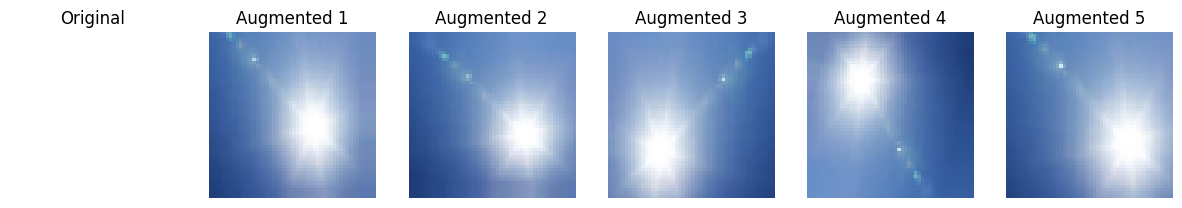

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

augmented_images = []
num_augmented_images = 5

random_index = np.random.randint(0, len(X_train))
sample_image = X_train[random_index]

sample_image = np.expand_dims(sample_image, axis=0)

for _ in range(num_augmented_images):
    augmented_image = datagen.flow(sample_image).next()[0].astype(np.uint8)
    augmented_images.append(augmented_image)

fig, axes = plt.subplots(1, num_augmented_images + 1, figsize=(15, 3))

axes[0].imshow(sample_image[0])
axes[0].set_title('Original')
axes[0].axis('off')

for i in range(num_augmented_images):
    axes[i+1].imshow(augmented_images[i])
    axes[i+1].set_title('Augmented {}'.format(i+1))
    axes[i+1].axis('off')

plt.show()


# Perform feature standardization

In [15]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# Perform feature standardization using preprocess_input from VGG16
X_train_standardized = preprocess_input(X_train)
X_test_standardized = preprocess_input(X_test)


# Perform ZCA whitening of your images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def zca_whitening(images):
    """
    Perform ZCA whitening on a set of images.

    Args:
    - images: NumPy array representing the images, with shape (num_samples, height, width, channels)

    Returns:
    - images_whitened: NumPy array containing the whitened images
    """

    # Reshape the images to 2D arrays
    num_samples, height, width, channels = images.shape
    images_reshaped = np.reshape(images, (num_samples, -1))

    # Compute the covariance matrix
    covariance_matrix = np.cov(images_reshaped, rowvar=False)

    # Compute the Singular Value Decomposition (SVD) of the covariance matrix
    U, S, _ = np.linalg.svd(covariance_matrix)

    # Compute the whitening matrix
    epsilon = 1e-5  # Small constant to avoid division by zero
    whitening_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

    # Whiten the images
    images_whitened_reshaped = np.dot(images_reshaped, whitening_matrix.T)

    # Reshape the whitened images back to the original shape
    images_whitened = np.reshape(images_whitened_reshaped, (num_samples, height, width, channels))

    return images_whitened

def visualize_images(images, num_images=5, title='Images'):
    """
    Visualize a random sample of images.

    Args:
    - images: NumPy array representing the images, with shape (num_samples, height, width, channels)
    - num_images: Number of images to visualize
    - title: Title for the plot
    """
    num_samples = images.shape[0]
    random_indices = np.random.choice(num_samples, num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(title)

    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].axis('off')

    plt.show()

# Apply ZCA whitening to the training and testing images
X_train_whitened = zca_whitening(X_train)
X_test_whitened = zca_whitening(X_test)

# Visualize original and whitened images
visualize_images(X_train, title='Original Training Images')
visualize_images(X_train_whitened, title='Whitened Training Images')


# Augment data with random rotations, shifts, and flips

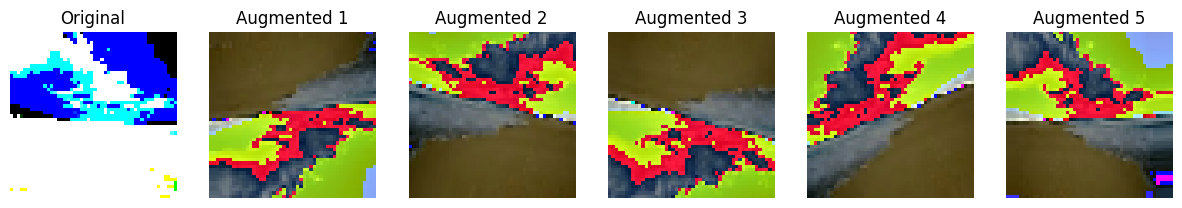

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

num_augmented_images = 5

random_index = np.random.randint(0, len(X_train))
sample_image = X_train[random_index]
sample_image = np.expand_dims(sample_image, axis=0)

augmented_images = []
for _ in range(num_augmented_images):
    augmented_image = datagen.flow(sample_image).next()[0].astype(np.uint8)
    augmented_images.append(augmented_image)

fig, axes = plt.subplots(1, num_augmented_images + 1, figsize=(15, 3))

axes[0].imshow(sample_image[0])
axes[0].set_title('Original')
axes[0].axis('off')

for i in range(num_augmented_images):
    axes[i+1].imshow(augmented_images[i])
    axes[i+1].set_title('Augmented {}'.format(i+1))
    axes[i+1].axis('off')

plt.show()


# Save augmented image data to disk

In [ ]:
import os

# Define directory to save augmented images
save_dir = "/content/drive/MyDrive/Multi-class Weather Dataset/augimg/"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Generate augmented images and save them to disk
for i in range(len(X_train)):
    sample_image = X_train[i]
    sample_image = np.expand_dims(sample_image, axis=0)

    for j, augmented_image in enumerate(datagen.flow(sample_image, batch_size=1)):
        augmented_image = augmented_image.astype(np.uint8)
        image_filename = os.path.join(save_dir, 'augmented_image_{}_{}.png'.format(i, j))
        plt.imsave(image_filename, augmented_image[0])
        if j >= num_augmented_images - 1:
            break


# Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task

Epoch 1/10
23/23 [==============================] - 8s 237ms/step - loss: 32.1233 - accuracy: 0.5264 - val_loss: 1.1667 - val_accuracy: 0.6111
Epoch 2/10
23/23 [==============================] - 2s 101ms/step - loss: 0.9110 - accuracy: 0.6931 - val_loss: 0.9908 - val_accuracy: 0.6222
Epoch 3/10
23/23 [==============================] - 3s 112ms/step - loss: 0.6017 - accuracy: 0.7917 - val_loss: 0.7489 - val_accuracy: 0.7667
Epoch 4/10
23/23 [==============================] - 2s 100ms/step - loss: 0.3555 - accuracy: 0.8847 - val_loss: 0.6753 - val_accuracy: 0.8056
Epoch 5/10
23/23 [==============================] - 2s 108ms/step - loss: 0.3025 - accuracy: 0.8986 - val_loss: 0.6952 - val_accuracy: 0.7944
Epoch 6/10
23/23 [==============================] - 4s 164ms/step - loss: 0.1468 - accuracy: 0.9583 - val_loss: 0.8253 - val_accuracy: 0.8167
Epoch 7/10
23/23 [==============================] - 3s 109ms/step - loss: 0.1003 - accuracy: 0.9625 - val_loss: 0.7542 - val_accuracy: 0.7778
Epoch

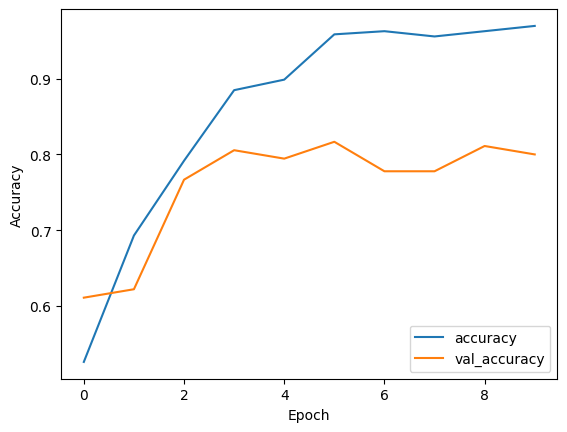

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assume you have already loaded and preprocessed your data into X_train, X_test, y_train, y_test

# Define classes
classes = ['Sunrise', 'Shine', 'Rain', 'Cloudy']

# Define model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Explore extensions to a baseline model to improve learning and model capacity.

Epoch 1/20
28/28 [==============================] - 9s 180ms/step - loss: 8.1524 - accuracy: 0.5178 - val_loss: 0.6079 - val_accuracy: 0.7822
Epoch 2/20
28/28 [==============================] - 4s 155ms/step - loss: 0.7507 - accuracy: 0.6933 - val_loss: 0.5198 - val_accuracy: 0.8489
Epoch 3/20
28/28 [==============================] - 6s 220ms/step - loss: 0.6512 - accuracy: 0.7489 - val_loss: 0.3972 - val_accuracy: 0.8622
Epoch 4/20
28/28 [==============================] - 4s 145ms/step - loss: 0.6287 - accuracy: 0.7656 - val_loss: 0.4646 - val_accuracy: 0.8267
Epoch 5/20
28/28 [==============================] - 5s 164ms/step - loss: 0.5760 - accuracy: 0.7900 - val_loss: 0.4634 - val_accuracy: 0.8356
Epoch 6/20
28/28 [==============================] - 6s 203ms/step - loss: 0.5678 - accuracy: 0.7944 - val_loss: 0.3786 - val_accuracy: 0.8622
Epoch 7/20
28/28 [==============================] - 4s 148ms/step - loss: 0.4574 - accuracy: 0.8467 - val_loss: 0.3940 - val_accuracy: 0.8267
Epoch 

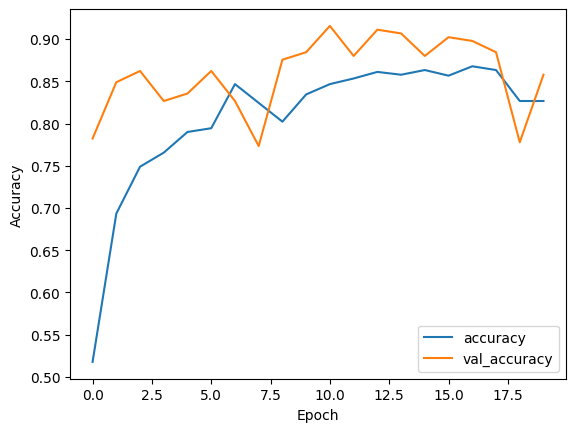

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Define classes
classes = ['Sunrise', 'Shine', 'Rain', 'Cloudy']

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Create model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen.fit(X_train)

# Train model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.

Epoch 1/20
28/28 [==============================] - 5s 154ms/step - loss: 8.1165 - accuracy: 0.5167 - val_loss: 0.5571 - val_accuracy: 0.7644
Epoch 2/20
28/28 [==============================] - 5s 160ms/step - loss: 0.7642 - accuracy: 0.6856 - val_loss: 0.4763 - val_accuracy: 0.8444
Epoch 3/20
28/28 [==============================] - 5s 180ms/step - loss: 0.6281 - accuracy: 0.7567 - val_loss: 0.4003 - val_accuracy: 0.8578
Epoch 4/20
28/28 [==============================] - 6s 218ms/step - loss: 0.6189 - accuracy: 0.7911 - val_loss: 0.4884 - val_accuracy: 0.7733
Epoch 5/20
28/28 [==============================] - 4s 154ms/step - loss: 0.6186 - accuracy: 0.7878 - val_loss: 0.4568 - val_accuracy: 0.8178
Epoch 6/20
28/28 [==============================] - 4s 149ms/step - loss: 0.5521 - accuracy: 0.7933 - val_loss: 0.3446 - val_accuracy: 0.8756
Epoch 7/20
28/28 [==============================] - 6s 196ms/step - loss: 0.5210 - accuracy: 0.8167 - val_loss: 0.3873 - val_accuracy: 0.8711
Epoch 

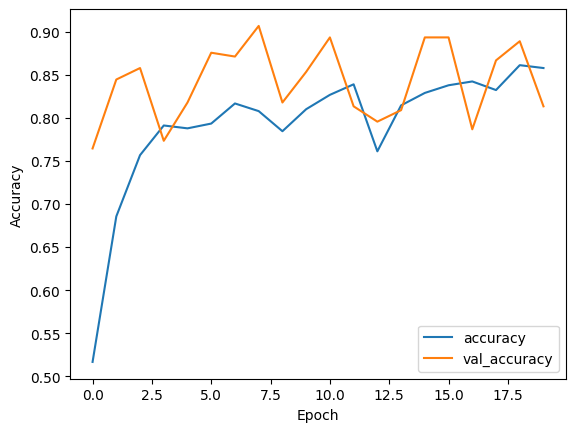

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os


# Define classes
classes = ['Sunrise', 'Shine', 'Rain', 'Cloudy']

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Create model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen.fit(X_train)

# Train model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



In [ ]:

# Load and preprocess new images
new_images_dir = "/content/drive/MyDrive/Multi-class Weather Dataset/weather/Cloudy"
new_images = []
image_filenames = []

for filename in os.listdir(new_images_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(os.path.join(new_images_dir, filename), target_size=(50, 50))
        img_array = img_to_array(img)
        new_images.append(img_array)
        image_filenames.append(filename)

new_images = np.array(new_images)

# Make predictions on the new images using the final model
predictions = model.predict(new_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions for each new image
for filename, predicted_class in zip(image_filenames, predicted_classes):
    print(f"Image: {filename}, Predicted Class: {classes[predicted_class]}")

10/10 [==============================] - 0s 33ms/step
Image: cloudy116.jpg, Predicted Class: Shine
Image: cloudy115.jpg, Predicted Class: Cloudy
Image: cloudy110.jpg, Predicted Class: Shine
Image: cloudy111.jpg, Predicted Class: Shine
Image: cloudy113.jpg, Predicted Class: Shine
Image: cloudy11.jpg, Predicted Class: Rain
Image: cloudy112.jpg, Predicted Class: Shine
Image: cloudy114.jpg, Predicted Class: Shine
Image: cloudy109.jpg, Predicted Class: Shine
Image: cloudy108.jpg, Predicted Class: Rain
Image: cloudy106.jpg, Predicted Class: Cloudy
Image: cloudy107.jpg, Predicted Class: Shine
Image: cloudy103.jpg, Predicted Class: Cloudy
Image: cloudy1.jpg, Predicted Class: Cloudy
Image: cloudy100.jpg, Predicted Class: Rain
Image: cloudy105.jpg, Predicted Class: Cloudy
Image: cloudy10.jpg, Predicted Class: Shine
Image: cloudy104.jpg, Predicted Class: Shine
Image: cloudy101.jpg, Predicted Class: Shine
Image: cloudy102.jpg, Predicted Class: Rain
Image: cloudy121.jpg, Predicted Class: Shine
Imag